<center><font size="10">Damien Vimala Hailson</font></center>
<br><center><font size="6">Github Username: Damien-Hailson</font></center>
<br><center><font size="6">Classification using KNN</font></center>

Importing required packages

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate
from scipy.linalg import pinv
import warnings
warnings.filterwarnings("ignore")

## Question 1(a) Getting data from vertebral column Dataset

In [2]:
#loading data on to a pandas data frame
data = arff.loadarff('../Data/vertebral_column_data/column_2C_weka.arff')
vertebral_column_df = pd.DataFrame(data[0])

In [3]:
vertebral_column_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [4]:
# Transforming Class variable to 0s and 1s
vertebral_column_df['class'] = vertebral_column_df['class'].replace(b'Abnormal', 1)
vertebral_column_df['class'] = vertebral_column_df['class'].replace(b'Normal', 0)

## Question 1(b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

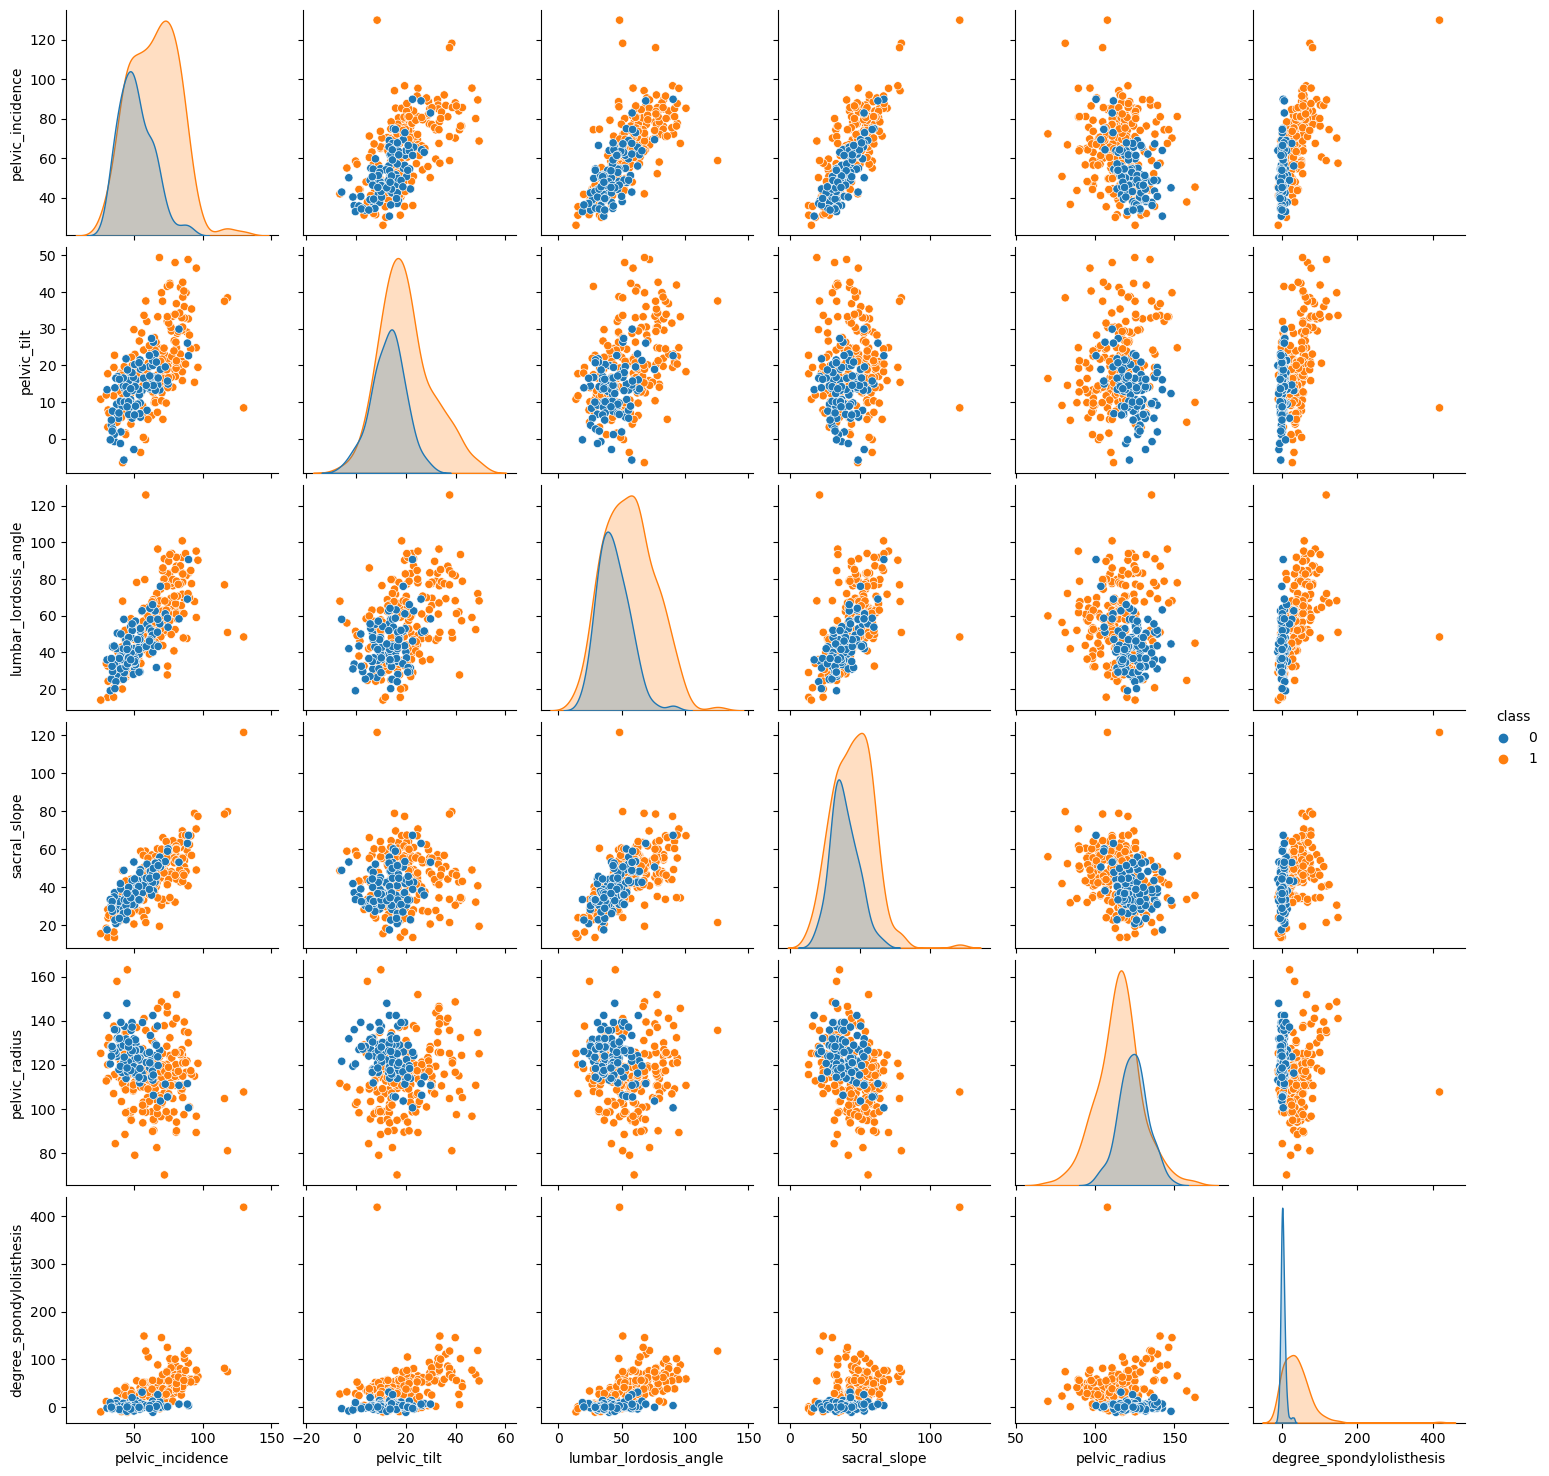

In [5]:
sns.pairplot(vertebral_column_df,hue = 'class')

#### ii. Boxplots

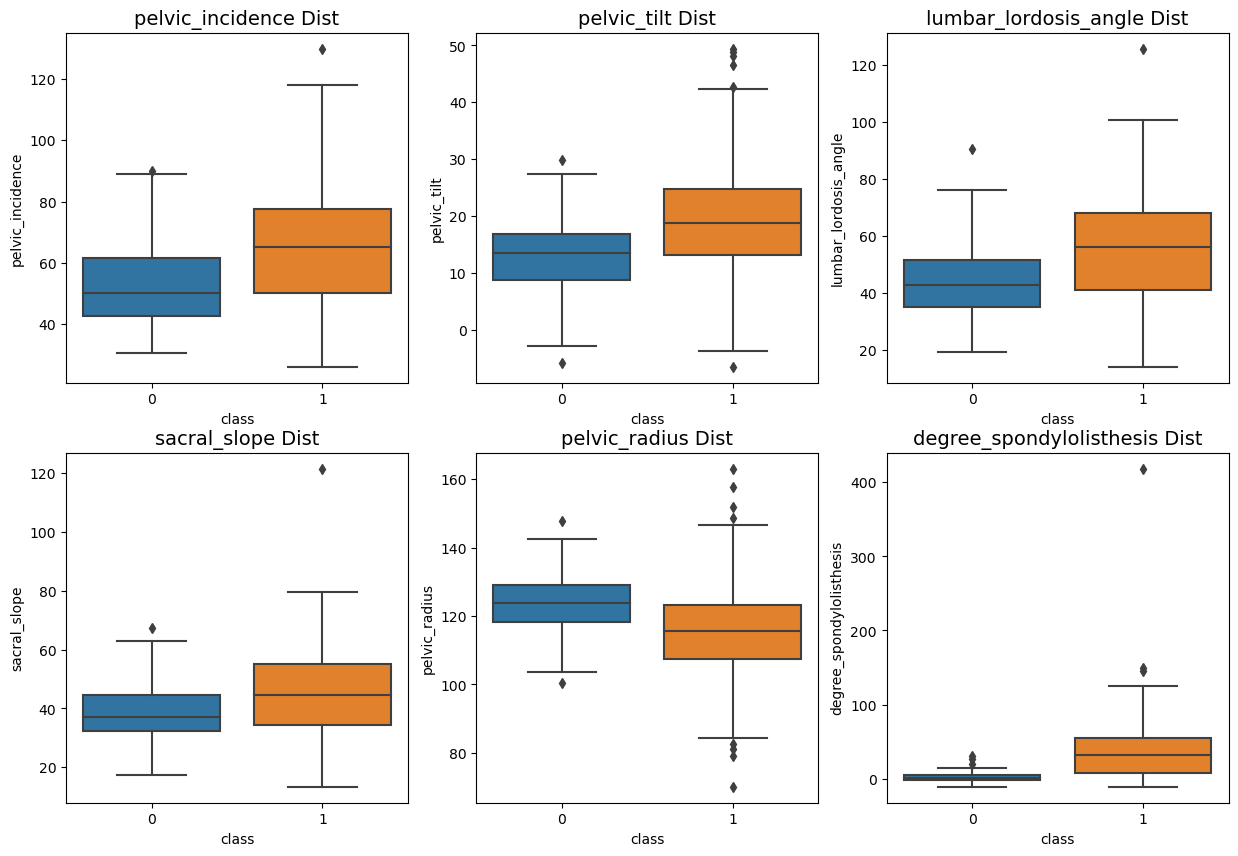

In [6]:
boxplot, axis = plt.subplots(2, 3, figsize=(15, 10))
for i, clm_nm in enumerate(vertebral_column_df.columns):
    if clm_nm != 'class':
        sns.boxplot(data=vertebral_column_df, x = 'class', y = clm_nm, ax=axis[int(i/3), i%3])
        axis[int(i/3), i%3].set_title(clm_nm + ' Dist', fontdict = {'fontsize': 14, 'color': 'black'})

#### iii. Spliting dataset into train and test

In [7]:
#Create training dataset- First 70 of Class = 0 and first 140 of class = 1
training_data = pd.concat([vertebral_column_df[(vertebral_column_df['class']) == 0][:70], vertebral_column_df[(vertebral_column_df['class']) == 1][:140]])
#remaining data points grouped as test data
test_data = pd.concat([vertebral_column_df[(vertebral_column_df['class']) == 0][70:], vertebral_column_df[(vertebral_column_df['class']) == 1][140:]])

# spliting up labels from train and test data
train_x = training_data.drop(['class'], axis = 1) #axis = 1 drops a column axis=0 drops a row
train_y = training_data['class']
test_x = test_data.drop(['class'], axis = 1)
test_y = test_data['class']

## Question 1(c) Classification using KNN

#### i. Euclidean distance Metric

In [8]:

model = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'euclidean', weights = 'uniform')
model.fit(train_x,train_y)

pred_test=model.predict(np.array(test_x))
pred_train=model.predict(np.array(train_x))


test_accuracy = accuracy_score(test_y, pred_test)
test_error=1-test_accuracy
#test_accuracy = model.score(test_x, test_y) #alternate

train_accuracy = accuracy_score(train_y, pred_train)
training_error=1-train_accuracy
#train_accuracy = model.score(train_x, train_y)

confusion_matrix = metrics.confusion_matrix(test_y, pred_test)

print(classification_report(test_y, pred_test))

print('Confusion Matrix : \n',confusion_matrix)


              precision    recall  f1-score   support

           0       1.00      0.67      0.80        30
           1       0.88      1.00      0.93        70

    accuracy                           0.90       100
   macro avg       0.94      0.83      0.87       100
weighted avg       0.91      0.90      0.89       100

Confusion Matrix : 
 [[20 10]
 [ 0 70]]


#### ii. Finding Optimal k (# of neighbours) with minimum test error

In [9]:
def KNClassifier (k,p,metric,weights,train_x_fn,train_y_fn,test_x_fn,test_y_fn) :
    model = KNeighborsClassifier(n_neighbors = k, p = p, metric = metric, weights = weights)
    model.fit(train_x_fn,train_y_fn)
    
    pred_test=model.predict(np.array(test_x_fn))
    pred_train=model.predict(np.array(train_x_fn))
    
    test_accuracy = accuracy_score(test_y_fn, pred_test)
    test_error=round(1-test_accuracy,2)
    
    train_accuracy = accuracy_score(train_y_fn, pred_train)
    training_error=round(1-train_accuracy,2)
    
    #confusion matrix
    
    confusion_matrix = metrics.confusion_matrix(test_y_fn, pred_test)
    TN=confusion_matrix[0][0]
    FN=confusion_matrix[1][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    true_positive_rate=round(TP/(TP+FN),2)
    true_negative_rate=round(TN/(TN+FP),2)
    Precision=round(TP/(TP+FP),2)
    F1=round(2 * Precision * true_positive_rate / (Precision + true_positive_rate), 2)
 
    
    return {
        'test_error' : test_error,
        'training_error' : training_error,
        'true_positive_rate': true_positive_rate,
        'true_negative_rate' : true_negative_rate,
        'precision' : Precision,
        'f1 score' : F1,
        'confusion_matrix' : confusion_matrix
        
    }
    
    #confusion matrix

k_range=list(range(1, 208, 3))
results={}
min_test_error=1.0
k_with_min_error=999
for k in k_range :
        results[k]=KNClassifier(k=k,p=2, metric = 'euclidean', weights = 'uniform',train_x_fn=train_x,train_y_fn=train_y,test_x_fn=test_x,test_y_fn=test_y)
        if min_test_error>results[k]['test_error'] :
            min_test_error=results[k]['test_error']
            k_with_min_error=k


In [10]:
print("Optimal k is ",k_with_min_error," with lowest test error \n")
print("scoring metrics for k = ",k_with_min_error,"\n")
for key in results[k_with_min_error].keys() :
    print(key," : \t",results[k_with_min_error][key])

Optimal k is  4  with lowest test error 

scoring metrics for k =  4 

test_error  : 	 0.06
training_error  : 	 0.14
true_positive_rate  : 	 0.99
true_negative_rate  : 	 0.83
precision  : 	 0.93
f1 score  : 	 0.96
confusion_matrix  : 	 [[25  5]
 [ 1 69]]


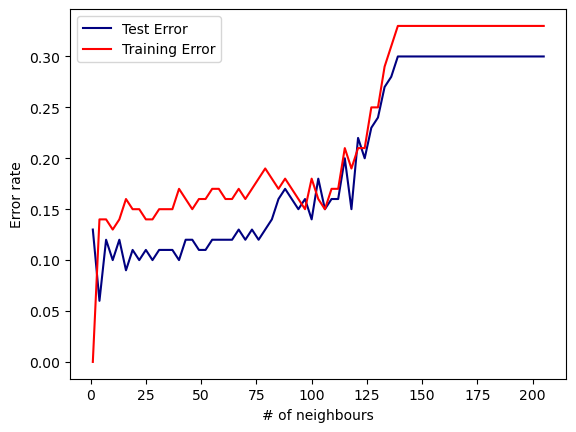

In [11]:
a=pd.DataFrame(results)
plt.plot(a.loc['test_error'],color='navy',label='Test Error')
plt.plot(a.loc['training_error'],color='red',label='Training Error')
plt.xlabel('# of neighbours')
plt.ylabel('Error rate')
plt.legend()
plt.show()

#### iii. Plotting Learning Curve

In [12]:
learning_curve_data={}
best_k={}
for n in range(1,200,10) :
    
    #creating subset of training data from master training dataset for each n
    train_1=pd.concat([training_data[(training_data['class'])==0][:int(n/3)],training_data[(training_data['class'])==1][:int(2*n/3)]])
    train_x1 = train_1.drop(['class'], axis = 1) 
    train_y1 = train_1['class']
    
    # iterating over k for each n
    k_range_1=list(range(1,n,5))
    results_1={}
    min_test_error_1=1.0
    k_with_min_error_1=9999
    for k in k_range_1 :
            results_1[k]=KNClassifier(k=k,p=2, metric = 'euclidean', weights = 'uniform',train_x_fn=train_x1,train_y_fn=train_y1,test_x_fn=test_x,test_y_fn=test_y)
            # finding best error rate and corresponding k
            if min_test_error_1>results_1[k]['test_error'] :
                min_test_error_1=results_1[k]['test_error']
                learning_curve_data[n]=min_test_error_1
                best_k[n]=k
    
    

Text(0, 0.5, 'Best Error rate')

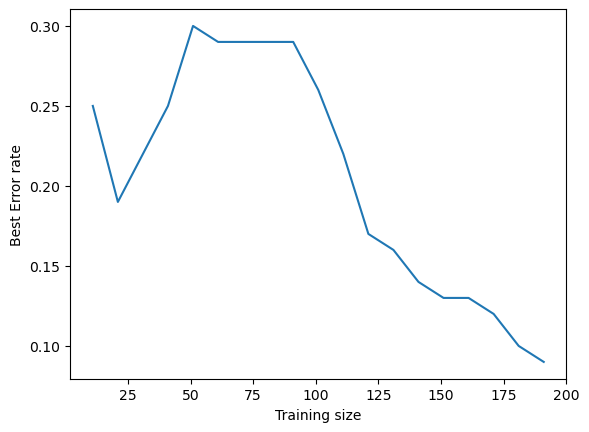

In [13]:
plt.plot(learning_curve_data.keys(),learning_curve_data.values())
plt.xlabel('Training size')
plt.ylabel('Best Error rate')

### Question 1(d) alternate distance Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [14]:

k_range=list(range(6,196,5))
results_manhattan={}
min_test_error_manhattan=1.0
k_with_min_error_manhattan=999
for k in k_range :
        results_manhattan[k]=KNClassifier(k=k,p=1, metric = 'manhattan', weights = 'uniform',train_x_fn=train_x,train_y_fn=train_y,test_x_fn=test_x,test_y_fn=test_y)
        if min_test_error_manhattan>results_manhattan[k]['test_error'] :
            min_test_error_manhattan=results_manhattan[k]['test_error']
            k_with_min_error_manhattan=k


In [15]:
print("Optimal k is ",k_with_min_error_manhattan," with lowest test error \n")
print("scoring metrics for k = ",k_with_min_error_manhattan,"\n")
for key in results_manhattan[k_with_min_error_manhattan].keys() :
    print(key," : \t",results_manhattan[k_with_min_error_manhattan][key])

Optimal k is  6  with lowest test error 

scoring metrics for k =  6 

test_error  : 	 0.11
training_error  : 	 0.14
true_positive_rate  : 	 0.96
true_negative_rate  : 	 0.73
precision  : 	 0.89
f1 score  : 	 0.92
confusion_matrix  : 	 [[22  8]
 [ 3 67]]


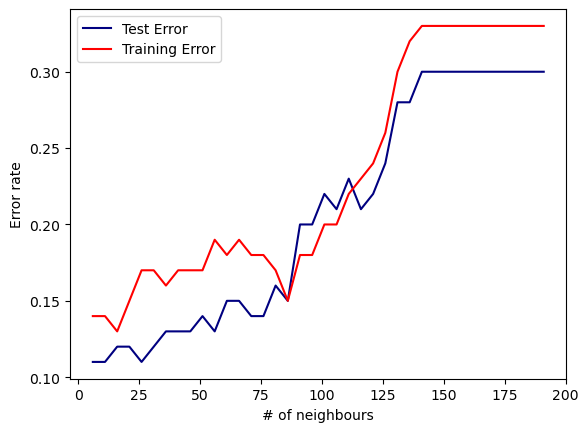

In [16]:
a=pd.DataFrame(results_manhattan)
plt.plot(a.loc['test_error'],color='navy',label='Test Error')
plt.plot(a.loc['training_error'],color='red',label='Training Error')
plt.xlabel('# of neighbours')
plt.ylabel('Error rate')
plt.legend()
plt.show()

In [17]:
a.loc['test_error']

6      0.11
11     0.11
16     0.12
21     0.12
26     0.11
31     0.12
36     0.13
41     0.13
46     0.13
51     0.14
56     0.13
61     0.15
66     0.15
71     0.14
76     0.14
81     0.16
86     0.15
91      0.2
96      0.2
101    0.22
106    0.21
111    0.23
116    0.21
121    0.22
126    0.24
131    0.28
136    0.28
141     0.3
146     0.3
151     0.3
156     0.3
161     0.3
166     0.3
171     0.3
176     0.3
181     0.3
186     0.3
191     0.3
Name: test_error, dtype: object

##### B. Finding best log109(p) where log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [18]:
# note; best k from manhattan = 6 used here
logp_with_lowest_test_error=None
min_test_error_logp=1
logp_range=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
results_logp={}
for logp in logp_range :
    p=pow(10,logp)
    results_logp[logp]=KNClassifier(k=6,p=p, metric = 'minkowski', weights = 'uniform',train_x_fn=train_x,train_y_fn=train_y,test_x_fn=test_x,test_y_fn=test_y)
    if  min_test_error_logp>results_logp[logp]['test_error'] :
        min_test_error_logp=results_logp[logp]['test_error']
        logp_with_lowest_test_error=logp

In [19]:
print("Optimal log p is ",logp_with_lowest_test_error," with lowest test error \n")
print("scoring metrics for logp = ",logp_with_lowest_test_error,"\n")
for key in results_logp[logp_with_lowest_test_error].keys() :
    print(key," : \t",results_logp[logp_with_lowest_test_error][key])

Optimal log p is  0.6  with lowest test error 

scoring metrics for logp =  0.6 

test_error  : 	 0.06
training_error  : 	 0.15
true_positive_rate  : 	 1.0
true_negative_rate  : 	 0.8
precision  : 	 0.92
f1 score  : 	 0.96
confusion_matrix  : 	 [[24  6]
 [ 0 70]]


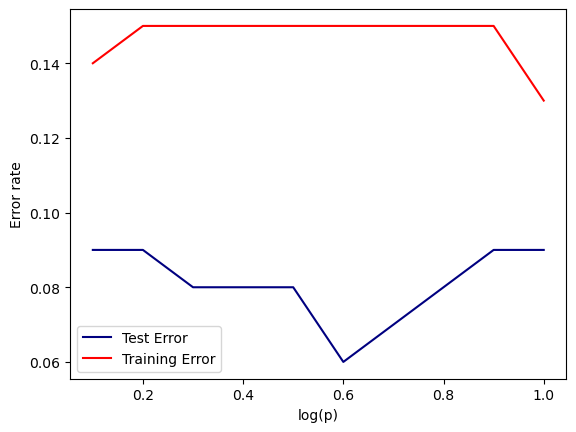

In [20]:
a=pd.DataFrame(results_logp)
plt.plot(a.loc['test_error'],color='navy',label='Test Error')
plt.plot(a.loc['training_error'],color='red',label='Training Error')
plt.xlabel('log(p)')
plt.ylabel('Error rate')
plt.legend()
plt.show()

##### C. Chebyshev Distance With p -> infinity.

In [21]:

k_range=list(range(1,196,5))
results_cheb={}
min_test_error_cheb=1.0
k_with_min_error_cheb=None
for k in k_range :
        results_cheb[k]=KNClassifier(k=k,p=float('inf'), metric = 'chebyshev',weights = 'uniform',train_x_fn=train_x,train_y_fn=train_y,test_x_fn=test_x,test_y_fn=test_y)
        if min_test_error_cheb>results_cheb[k]['test_error'] :
            min_test_error_cheb=results_cheb[k]['test_error']
            k_with_min_error_cheb=k


In [22]:
print("Optimal k is ",k_with_min_error_cheb," with lowest test error \n")
print("scoring metrics for k = ",k_with_min_error_cheb,"\n")
for key in results_cheb[k_with_min_error_cheb].keys() :
    print(key," : \t",results_cheb[k_with_min_error_cheb][key])

Optimal k is  16  with lowest test error 

scoring metrics for k =  16 

test_error  : 	 0.08
training_error  : 	 0.15
true_positive_rate  : 	 1.0
true_negative_rate  : 	 0.73
precision  : 	 0.9
f1 score  : 	 0.95
confusion_matrix  : 	 [[22  8]
 [ 0 70]]


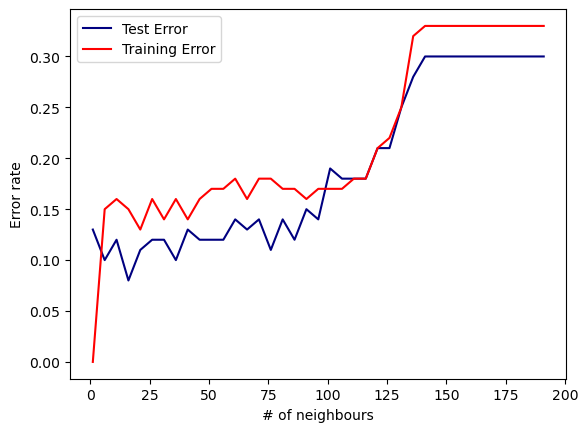

In [23]:
a=pd.DataFrame(results_cheb)
plt.plot(a.loc['test_error'],color='navy',label='Test Error')
plt.plot(a.loc['training_error'],color='red',label='Training Error')
plt.xlabel('# of neighbours')
plt.ylabel('Error rate')
plt.legend()
plt.show()

In [24]:
a.loc['test_error']

1      0.13
6       0.1
11     0.12
16     0.08
21     0.11
26     0.12
31     0.12
36      0.1
41     0.13
46     0.12
51     0.12
56     0.12
61     0.14
66     0.13
71     0.14
76     0.11
81     0.14
86     0.12
91     0.15
96     0.14
101    0.19
106    0.18
111    0.18
116    0.18
121    0.21
126    0.21
131    0.25
136    0.28
141     0.3
146     0.3
151     0.3
156     0.3
161     0.3
166     0.3
171     0.3
176     0.3
181     0.3
186     0.3
191     0.3
Name: test_error, dtype: object

#### ii. Mahalanobis Distance.

In [25]:

def KNClassifier_mahalanobis (k,metric,metric_params,train_x_fn,train_y_fn,test_x_fn,test_y_fn) :
    model = KNeighborsClassifier(n_neighbors = k,metric=metric,metric_params=metric_params)
    model.fit(train_x_fn,train_y_fn)
    
    pred_test=model.predict(np.array(test_x_fn))
    pred_train=model.predict(np.array(train_x_fn))
    
    test_accuracy = accuracy_score(test_y_fn, pred_test)
    test_error=round(1-test_accuracy,2)
    
    train_accuracy = accuracy_score(train_y_fn, pred_train)
    training_error=round(1-train_accuracy,2)
    
    #confusion matrix
    
    confusion_matrix = metrics.confusion_matrix(test_y_fn, pred_test)
    TN=confusion_matrix[0][0]
    FN=confusion_matrix[1][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    true_positive_rate=round(TP/(TP+FN),2)
    true_negative_rate=round(TN/(TN+FP),2)
    Precision=round(TP/(TP+FP),2)
    F1=round(2 * Precision * true_positive_rate / (Precision + true_positive_rate), 2)
 
    
    return {
        'test_error' : test_error,
        'training_error' : training_error,
        'true_positive_rate': true_positive_rate,
        'true_negative_rate' : true_negative_rate,
        'precision' : Precision,
        'f1 score' : F1,
        'confusion_matrix' : confusion_matrix
        
    }
    

In [26]:

k_range=list(range(6,196,5))
results_mahalanobis={}
min_test_error_mahalanobis=1.0
k_with_min_error_mahalanobis=None
for k in k_range :
        results_mahalanobis[k]=KNClassifier_mahalanobis(k=k,metric='mahalanobis',metric_params={'VI': pinv(np.cov(train_x.T))},train_x_fn=train_x,train_y_fn=train_y,test_x_fn=test_x,test_y_fn=test_y)
        if min_test_error_mahalanobis>results_mahalanobis[k]['test_error'] :
            min_test_error_mahalanobis=results_mahalanobis[k]['test_error']
            k_with_min_error_mahalanobis =k


In [27]:
print("Optimal k is ",k_with_min_error_mahalanobis," with lowest test error \n")
print("scoring metrics for k = ",k_with_min_error_mahalanobis,"\n")
for key in results_mahalanobis[k_with_min_error_mahalanobis].keys() :
    print(key," : \t",results_mahalanobis[k_with_min_error_mahalanobis][key])

Optimal k is  6  with lowest test error 

scoring metrics for k =  6 

test_error  : 	 0.16
training_error  : 	 0.14
true_positive_rate  : 	 0.93
true_negative_rate  : 	 0.63
precision  : 	 0.86
f1 score  : 	 0.89
confusion_matrix  : 	 [[19 11]
 [ 5 65]]


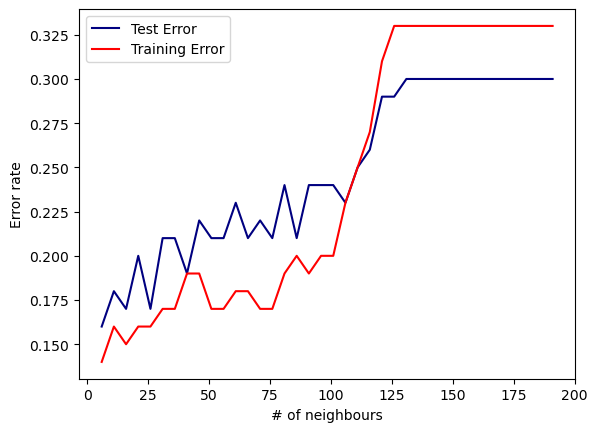

In [28]:
a=pd.DataFrame(results_mahalanobis)
plt.plot(a.loc['test_error'],color='navy',label='Test Error')
plt.plot(a.loc['training_error'],color='red',label='Training Error')
plt.xlabel('# of neighbours')
plt.ylabel('Error rate')
plt.legend()
plt.show()

In [29]:
a.loc['test_error']

6      0.16
11     0.18
16     0.17
21      0.2
26     0.17
31     0.21
36     0.21
41     0.19
46     0.22
51     0.21
56     0.21
61     0.23
66     0.21
71     0.22
76     0.21
81     0.24
86     0.21
91     0.24
96     0.24
101    0.24
106    0.23
111    0.25
116    0.26
121    0.29
126    0.29
131     0.3
136     0.3
141     0.3
146     0.3
151     0.3
156     0.3
161     0.3
166     0.3
171     0.3
176     0.3
181     0.3
186     0.3
191     0.3
Name: test_error, dtype: object

##  Question 1(e) Replaicing uniform weights with weights pegged to inverse of distance

#### Euclidean

In [30]:
#Euclidean

k_range=list(range(1, 200, 5))
results_weighted={}
min_test_error_weighted=1.0
k_with_min_error_weighted=None
for k in k_range :
        results_weighted[k]=KNClassifier(k=k,p=2, metric = 'euclidean', weights = 'distance',train_x_fn=train_x,train_y_fn=train_y,test_x_fn=test_x,test_y_fn=test_y)
        if min_test_error_weighted>results_weighted[k]['test_error'] :
            min_test_error_weighted=results_weighted[k]['test_error']
            k_with_min_error_weighted=k


In [31]:
print("Optimal k is ",k_with_min_error_weighted," with lowest test error \n")
print("scoring metrics for k = ",k_with_min_error_weighted,"\n")
for key in results_weighted[k_with_min_error_weighted].keys() :
    print(key," : \t",results_weighted[k_with_min_error_weighted][key])

Optimal k is  6  with lowest test error 

scoring metrics for k =  6 

test_error  : 	 0.1
training_error  : 	 0.0
true_positive_rate  : 	 1.0
true_negative_rate  : 	 0.67
precision  : 	 0.88
f1 score  : 	 0.94
confusion_matrix  : 	 [[20 10]
 [ 0 70]]


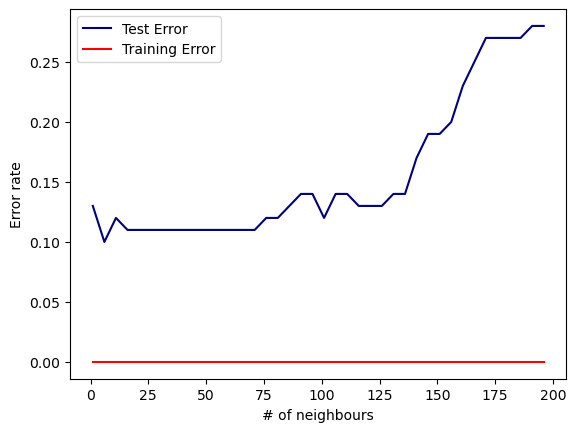

In [32]:
a=pd.DataFrame(results_weighted)
plt.plot(a.loc['test_error'],color='navy',label='Test Error')
plt.plot(a.loc['training_error'],color='red',label='Training Error')
plt.xlabel('# of neighbours')
plt.ylabel('Error rate')
plt.legend()
plt.show()

#### Manhattan distacne

In [33]:
#Manhattan

k_range=list(range(1, 200, 5))
results_weighted_manh={}
min_test_error_weighted_manh=1.0
k_with_min_error_weighted_manh=None
for k in k_range :
        results_weighted_manh[k]=KNClassifier(k=k,p=1, metric = 'manhattan', weights = 'distance',train_x_fn=train_x,train_y_fn=train_y,test_x_fn=test_x,test_y_fn=test_y)
        if min_test_error_weighted_manh>results_weighted_manh[k]['test_error'] :
            min_test_error_weighted_manh=results_weighted_manh[k]['test_error']
            k_with_min_error_weighted_manh=k


In [34]:
print("Optimal k is ",k_with_min_error_weighted_manh," with lowest test error \n")
print("scoring metrics for k = ",k_with_min_error_weighted_manh,"\n")
for key in results_weighted_manh[k_with_min_error_weighted_manh].keys() :
    print(key," : \t",results_weighted_manh[k_with_min_error_weighted_manh][key])

Optimal k is  26  with lowest test error 

scoring metrics for k =  26 

test_error  : 	 0.1
training_error  : 	 0.0
true_positive_rate  : 	 0.99
true_negative_rate  : 	 0.7
precision  : 	 0.88
f1 score  : 	 0.93
confusion_matrix  : 	 [[21  9]
 [ 1 69]]


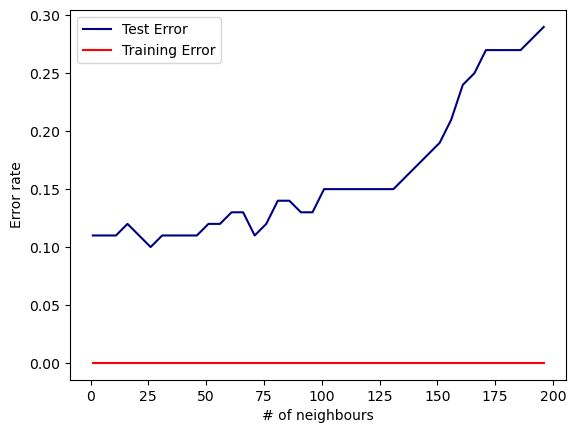

In [35]:
a=pd.DataFrame(results_weighted_manh)
plt.plot(a.loc['test_error'],color='navy',label='Test Error')
plt.plot(a.loc['training_error'],color='red',label='Training Error')
plt.xlabel('# of neighbours')
plt.ylabel('Error rate')
plt.legend()
plt.show()

#### Chebyshev distance

In [36]:
#Chebyshev

k_range=list(range(1, 200, 5))
results_weighted_cheb={}
min_test_error_weighted_cheb=1.0
k_with_min_error_weighted_cheb=None
for k in k_range :
        results_weighted_cheb[k]=KNClassifier(k=k,p=float('inf'), metric = 'chebyshev', weights = 'distance',train_x_fn=train_x,train_y_fn=train_y,test_x_fn=test_x,test_y_fn=test_y)
        if min_test_error_weighted_cheb>results_weighted_cheb[k]['test_error'] :
            min_test_error_weighted_cheb=results_weighted_cheb[k]['test_error']
            k_with_min_error_weighted_cheb=k


In [37]:
print("Optimal k is ",k_with_min_error_weighted_cheb," with lowest test error \n")
print("scoring metrics for k = ",k_with_min_error_weighted_cheb,"\n")
for key in results_weighted_cheb[k_with_min_error_weighted_cheb].keys() :
    print(key," : \t",results_weighted_cheb[k_with_min_error_weighted_cheb][key])

Optimal k is  16  with lowest test error 

scoring metrics for k =  16 

test_error  : 	 0.11
training_error  : 	 0.0
true_positive_rate  : 	 1.0
true_negative_rate  : 	 0.63
precision  : 	 0.86
f1 score  : 	 0.92
confusion_matrix  : 	 [[19 11]
 [ 0 70]]


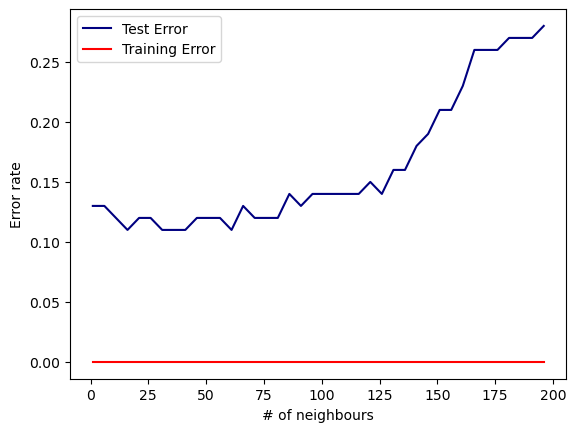

In [38]:
a=pd.DataFrame(results_weighted_cheb)
plt.plot(a.loc['test_error'],color='navy',label='Test Error')
plt.plot(a.loc['training_error'],color='red',label='Training Error')
plt.xlabel('# of neighbours')
plt.ylabel('Error rate')
plt.legend()
plt.show()

### (f) Best Training Error Rate throughout the homework

Best training error throught out this homework is 0.0 when k=1 and using euclidean distance with uniform weights. 